In [1]:
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Flatten

In [2]:
# Prepare independent features and dependent features
def prepare_data(timeseries_data, n_features):
    X, y = [], []
    for i in range(len(timeseries_data)):
        end_ix = i +n_features
        if end_ix > len(timeseries_data) - 1:
            break
        # gather input and output parts of the pattern
        seq_x, seq_y = timeseries_data[i:end_ix], timeseries_data[end_ix]
        X.append(seq_x)
        y.append(seq_y)
    return np.array(X), np.array(y)

In [6]:
# define input sequence
timeseries_data = [110, 125,133,146, 158, 172, 196, 210, 225]

# choose a number of time steps
n_feature = 3

#split into samples
X, y = prepare_data(timeseries_data, n_feature)

In [7]:
print(X)
print(y)

[[110 125 133]
 [125 133 146]
 [133 146 158]
 [146 158 172]
 [158 172 196]
 [172 196 210]]
[146 158 172 196 210 225]


In [8]:
X.shape, y.shape

((6, 3), (6,))

In [9]:
#reshape from [samples, timesptes] into [samples, timesteps,features]
n_features = 1
X = X.reshape(X.shape[0], X.shape[1], n_features)

In [10]:
X.shape

(6, 3, 1)

# Building LSTM Model

In [11]:
model = Sequential()
model.add(LSTM(50,activation ='relu', return_sequences = True, input_shape=(n_feature,n_features)))
model.add(LSTM(50, activation = 'relu'))
model.add(Dense(1))
model.compile(optimizer = 'adam',loss= 'mse')

# fit model
model.fit(X, y, epochs= 300, verbose= 0)

# Predicting for the next 10 days

In [12]:
x_input = np.array([187, 196, 210])
temp_input = list(x_input)
lst_output = []
i=0
while(i<10):
    if (len(temp_input) > 3):
        x_input = np.array(temp_input[1:])
        # print (x_input)
        print("{} day input: {}".format(i, x_input))
        x_input = x_input.reshape((1, n_feature, n_features))
        yhat = model.predict(x_input, verbose = 0)
        print("{} day output: {}".format(i,yhat[0][0]))
        print()
        temp_input.append(yhat[0][0])
        temp_input = temp_input[1:]
        # print(temp_input)
        lst_output.append(yhat[0][0])
        i = i +1
    else:
        x_input = x_input.reshape((1, n_feature, n_features))
        yhat = model.predict(x_input, verbose = 0)
        #print(yhat.shape)
        # print(yhat[0][0])
        temp_input.append(yhat[0][0])
        lst_output.append(yhat[0][0])
        i = i+1

1 day input: [196.         210.         238.79914856]
1 day output: 255.27601623535156

2 day input: [210.         238.79914856 255.27601624]
2 day output: 278.5433044433594

3 day input: [238.79915 255.27602 278.5433 ]
3 day output: 307.7838134765625

4 day input: [255.27602 278.5433  307.7838 ]
4 day output: 332.6785583496094

5 day input: [278.5433  307.7838  332.67856]
5 day output: 363.4881896972656

6 day input: [307.7838  332.67856 363.4882 ]
6 day output: 397.44061279296875

7 day input: [332.67856 363.4882  397.4406 ]
7 day output: 431.5448303222656

8 day input: [363.4882  397.4406  431.54483]
8 day output: 470.7359619140625

9 day input: [397.4406  431.54483 470.73596]
9 day output: 512.9437255859375



# Visualizing the output

In [13]:
import matplotlib.pyplot as plt

In [14]:
timeseries_data

[110, 125, 133, 146, 158, 172, 196, 210, 225]

In [15]:
lst_output

[238.79915,
 255.27602,
 278.5433,
 307.7838,
 332.67856,
 363.4882,
 397.4406,
 431.54483,
 470.73596,
 512.9437]

In [16]:
day_new = np.arange(1,10)
day_pred = np.arange(10,20)


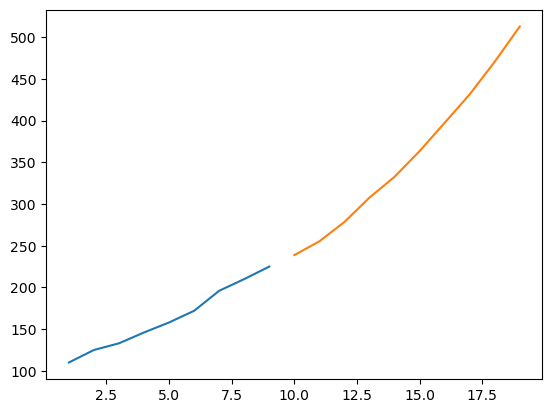

In [17]:
plt.plot(day_new, timeseries_data)
plt.plot(day_pred,lst_output)